# Overall records stats

These are stats over the whole data set, with no cuts by any other factor.

To process for the latest data, run the [File Processing](./) notebook.

## Findings list
- [Cases over time](#Cases-over-time)
- [Deaths by race](#Deaths-by-race)
- [Deaths by manner of death](#Deaths-by-manner-of-death)
- [Mental Health cases](#Mental-health-related-cases)


In [1]:
import agate
import datetime
import warnings
warnings.filterwarnings('ignore')

## Get the data

In [2]:
# sets data types on fields agate got wrong
specified_data_types = {
    'tracked_cause': agate.Text(),
    'offense': agate.Text(),
    'case_study': agate.Text(),
    'official_discipline': agate.Text()
}

# this pulls the deaths file that is exported in the File processing notebook
deaths = agate.Table.from_csv('../exports/deaths_latest.csv', column_types=specified_data_types)

print(deaths)

| column               | data_type |
| -------------------- | --------- |
| id                   | Number    |
| ag_report_url        | Text      |
| first_name           | Text      |
| middle_name          | Text      |
| last_name            | Text      |
| suffix               | Text      |
| slug                 | Text      |
| race                 | Text      |
| gender               | Text      |
| date_of_birth        | Date      |
| date_of_death        | Date      |
| age                  | Number    |
| agency               | Number    |
| restrained           | Boolean   |
| tazed                | Boolean   |
| times_tazed          | Number    |
| pepper_sprayed       | Boolean   |
| official_discipline  | Text      |
| grand_jury_result    | Text      |
| mental_health_issues | Boolean   |
| manner_of_death      | Text      |
| drug_intoxication    | Boolean   |
| cause_of_death       | Text      |
| tracked_cause        | Text      |
| offense              | Text      |
|

## Cases over time

Total deaths: 289

Cases by year:

| Year | Count |
| ---- | ----- |
| 2005 |    20 |
| 2006 |    37 |
| 2007 |    37 |
| 2008 |    19 |
| 2009 |    20 |
| 2010 |    20 |
| 2011 |    26 |
| 2012 |    16 |
| 2013 |    21 |
| 2014 |    25 |
| 2015 |    38 |
| 2016 |    10 |

Chart by year:

Year Count
2005    20 ▓░░░░░░░░░░░░░░░░░░░░░░░░                        
2006    37 ▓░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    
2007    37 ▓░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    
2008    19 ▓░░░░░░░░░░░░░░░░░░░░░░░                         
2009    20 ▓░░░░░░░░░░░░░░░░░░░░░░░░                        
2010    20 ▓░░░░░░░░░░░░░░░░░░░░░░░░                        
2011    26 ▓░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░                 
2012    16 ▓░░░░░░░░░░░░░░░░░░░                             
2013    21 ▓░░░░░░░░░░░░░░░░░░░░░░░░░                       
2014    25 ▓░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░                  
2015    38 ▓░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  
2016    10 ▓░░░░░░░░░░░░    

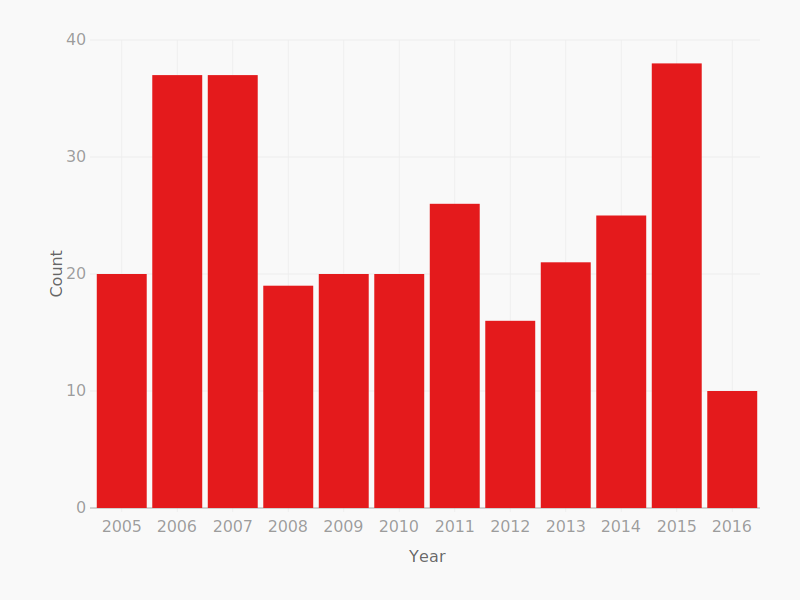

In [3]:
# Add a year column to the data set
deaths_year = deaths.compute([
    ('Year', agate.Formula(agate.Text(), lambda r: r['date_of_death'].year))
])

# pivot the death_year table on year
deaths_year_pivot = deaths_year.pivot('Year').order_by('Year')

# get and print total number of cases
deaths_total_count = len(deaths)
print('Total deaths: {}\n'.format(deaths_total_count))

# print simple table by year
print('Cases by year:\n')
deaths_year_pivot.print_table()

# print bar chart of cases by year
print('\nChart by year:\n')
deaths_year_pivot.print_bars('Year', 'Count', width=60)

# export data for csv
deaths_year_pivot.to_csv('../exports/deaths_year_pivot.csv')

# export svg of cases by years
deaths_year_pivot.column_chart('Year', 'Count', '../charts/deaths_year_pivot.svg')

# svg to screen of cases by  years
print('\nSVG Chart by year:\n')
deaths_year_pivot.column_chart('Year', 'Count')


## Deaths by race

In [4]:
# pivot deaths by race
race_pivot = deaths.pivot('race_name')

# print the table
print('Breakdown of the total cases ({}) by race:\n'.format(
    deaths_total_count))
race_pivot.print_table()

# export to csv?
race_pivot.to_csv('../exports/deaths_race_pivot.csv')

print('\nSimple chart of total cases ({}) by race:\n'.format(
    deaths_total_count
    ))
# print bar chart of pivot
race_pivot.print_bars('race_name', 'Count', width=60)

Breakdown of the total cases (289) by race:

| race_name       | Count |
| --------------- | ----- |
| White           |    93 |
| Black           |   101 |
| Hispanic/Latino |    91 |
| Asian           |     4 |

Simple chart of total cases (289) by race:

race_name       Count
White              93 ▓░░░░░░░░░░░░░░░░░                    
Black             101 ▓░░░░░░░░░░░░░░░░░░░                  
Hispanic/Latino    91 ▓░░░░░░░░░░░░░░░░░                    
Asian               4 ▓░                                    
                      +--------+--------+---------+--------+
                      0       50       100       150     200


## Deaths by manner of death

In [5]:
# pivot based on the manner
manner_pivot = deaths.pivot('manner_name')

# print chart of the results
print('Total cases ({}) broken down by manner of death:\n'.format(
    deaths_total_count))
manner_pivot.print_table()

# print bar chart of pivot
print('\nSimple for manner of death:\n')
manner_pivot.print_bars('manner_name', 'Count', width=60)

# export the manner of death by year
manner_pivot.to_csv('../exports/deaths_manner_pivot.csv')

Total cases (289) broken down by manner of death:

| manner_name  | Count |
| ------------ | ----- |
| Accident     |   150 |
| Natural      |    21 |
|              |    25 |
| Undetermined |    16 |
| Homicide     |    77 |

Simple for manner of death:

manner_name  Count
Accident       150 ▓░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░          
Natural         21 ▓░░░░                                    
None            25 ▓░░░░░                                   
Undetermined    16 ▓░░░                                     
Homicide        77 ▓░░░░░░░░░░░░░░░                         
                   +---------+---------+---------+---------+
                   0        50        100       150      200


## Mental health-related cases

Just getting the number of cases where we know there were mental health complications based on documents or reporting. This is based on the **`mental_health_issues`** field.

In [6]:
deaths.aggregate(agate.Count('mental_health_issues', True))

34